## Himalaya Climbing Expeditions

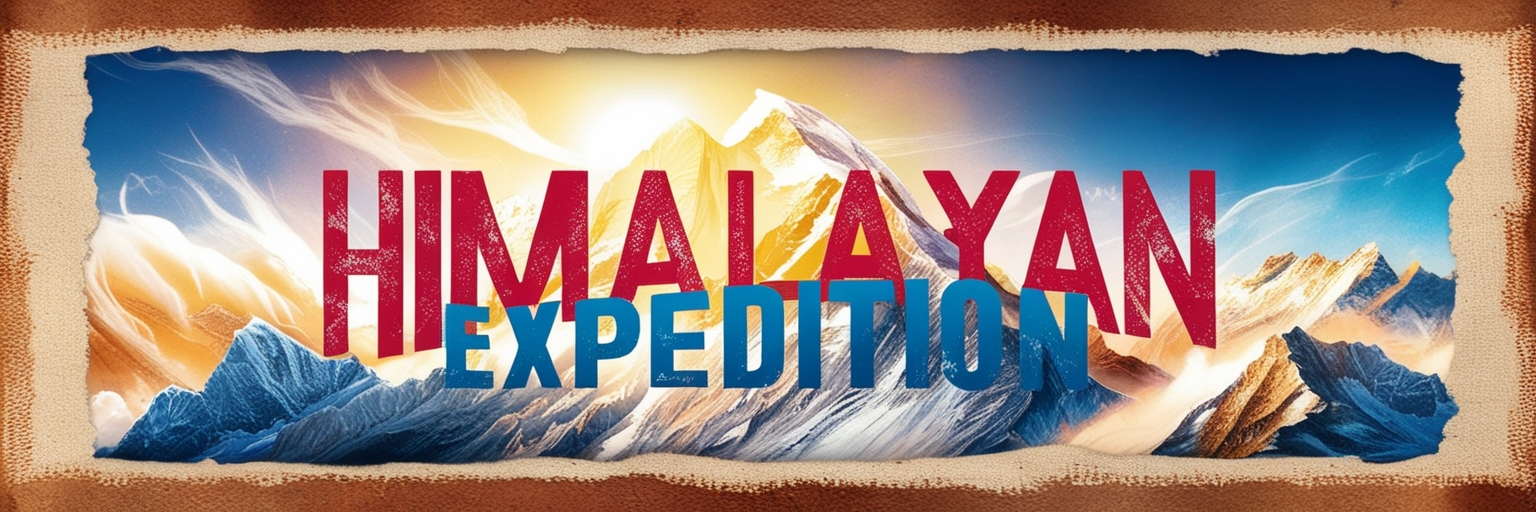

---

Con este proyecto se busca tratar los datos de las expediciones al Himalaya desde 1905 a 2019 que han sido registradas y responder a una serie de preguntas para lograr nuestro objetivo final.

**Preguntas planteadas**

Analizaremos un conjunto de datos sobre las expediciones al Himalaya desde 1905 a 2019:
- ¿Cuál fue la primera expedición en llegar a la cima del Everest?
- ¿Cual es la mejor estacion del año para hacer una expedicion? ¿Cuál es el pico con mayor expediciones en la temporada de otoño?
- ¿Por qué hay ciertas expediciones que nunca terminaron?
- ¿Cuántas expediciones subieron con oxígeno?
- ¿Cuales son las 50 expediciones con mas miembros?

Analizaremos un conjunto de datos sobre los picos:
- ¿Cuáles son los 8000 de la cordillera del Himalaya?
- ¿Hay mas picos escalados que sin escalar?
- ¿Cuáles son las nacionalidades con más primeras ascensiones? ¿Cuál fue el primer país en intentar llegar a la cumbre del Everest sin éxito?
- ¿Cual es el pico mas letal?

Analizaremos un conjunto de datos sobre los miembros de las expediciones:
- ¿Cuál ha sido el suceso mas grave en la cordillera del Himalaya por españoles?
- ¿Cuántos miembros de las expediciones fueron afectados a lo largo de los años?
- ¿Qué roles son mas habituales en una expedicion?
- De los alpinistas del Himalaya, ¿Cuántos escalaron solos y cuántos acompañados?
- ¿Cuantas mujeres realizaron expediciones? ¿Cual fue la primera en subir a Everest?


---

In [1]:
# Importamos librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.image import imread
import matplotlib.image as mpimg
import folium

In [2]:
# Cargamos los datasets
expeditions = pd.read_csv('himalayan_expeditions_copy.csv')
members = pd.read_csv('members_copy.csv')
peaks = pd.read_csv('peaks_copy.csv')
peaks_original = pd.read_csv('peaks.csv')

## 1. Expediciones 🗺️

### ¿Cuál fue la primera expedicion en llegar a la cima del Everest?

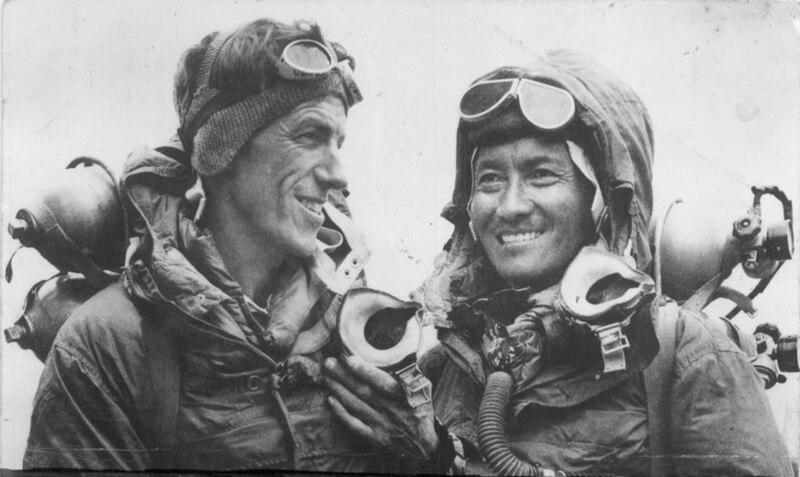

In [3]:
# Consultamos la información del dataset que demuestra su veracidad 
everest = expeditions[(expeditions['peak_name']=='Everest') & (expeditions['year']==1953)]
everest

Unnamed: 0 expedition_id peak_id peak_name  year  season  \
2768        2769     EVER53101    EVER   Everest  1953  Spring   

       termination_reason  highpoint_metres  members  member_deaths  \
2768  Success (main peak)            8850.0       13              0   

      hired_staff  hired_staff_deaths oxygen_used  
2768           20                   0         Yes

La expedición británica de 1953, liderada de forma militar por Sir John Hunt, fue extremadamente exagerada debido a toda la carga que tuvieron que arrastrar 350 porteadores, 20 sherpas y toneladas de suministros como soporte para un grupo de tan solo diez escaladores.
 
En la primavera de 1953  a las 9 de la mañana alcanzaron la cima sur, pero la auténtica cima situada a 12m de altura, se alcanzó a las 11:30 de un 29 de mayo de 1953 por Sir Edmund Hillary y Tenzing Norgay, permanecieron en la cumbre el tiempo suficiente para tomar fotografías y enterrar algunos dulces y una pequeña cruz en la nieve.
Al regresar de la cima, las primeras palabras de Hillary a George Lowe fueron: ”Bueno, George, tumbamos al bastardo”.

### ¿Cual es la mejor estacion del año para hacer una expedicion? ¿Cuál es el pico con mayor expediciones en la temporada de otoño?

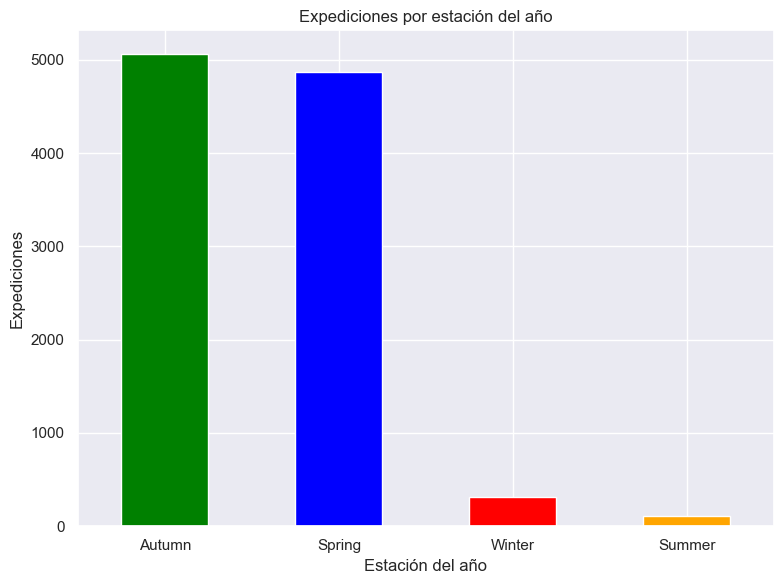

In [23]:
# Ordenamos las estaciones por orden lógico
contador_temporadas = expeditions['season'].value_counts()
season_counts = contador_temporadas.reindex(['Spring', 'Summer', 'Autumn', 'Winter'])
colores = ['green', 'blue', 'red', 'orange']

# Graficamos
plt.figure(figsize=(8, 6))
contador_temporadas.plot(kind='bar', color=colores)
plt.title('Expediciones por estación del año')
plt.xlabel('Estación del año')
plt.ylabel('Expediciones')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
# Vamos a agrupar ambas columnas para conocer que estaciones son las que mas expediciones se hacen
mejor_estacion_año = expeditions.groupby('season')['peak_name'].count()
pd.DataFrame(mejor_estacion_año)

peak_name
season           
Autumn       5064
Spring       4875
Summer        108
Winter        315

In [25]:
# Vamos a consultar cual es el pico con mas expediciones en invierno
expediciones_otoño = expeditions[expeditions['season'] == 'Autumn']
contador_expediciones = expediciones_otoño['peak_name'].value_counts()
pico_mas_escalado_otoño = contador_expediciones.head(1)
pico_mas_escalado_otoño

peak_name
Ama Dablam    1066
Name: count, dtype: int64

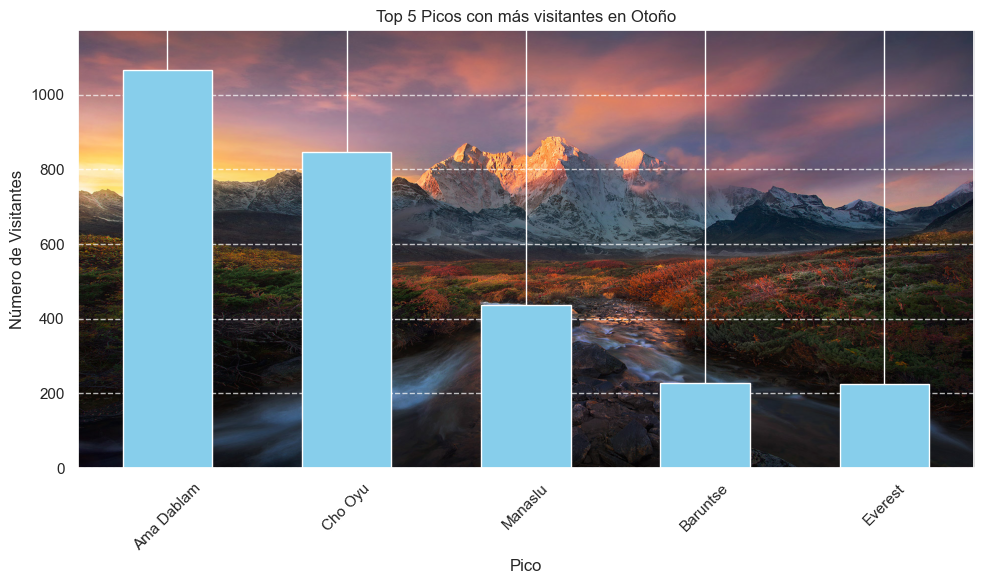

In [22]:
# Vamos a calcular el top 5 de picos mas visitas en otoño
expediciones_otoño = expeditions[expeditions['season'] == 'Autumn']
contador_expediciones = expediciones_otoño['peak_name'].value_counts()
top_5_picos = contador_expediciones.sort_values(ascending=False).head(5)

imagen_fondo = mpimg.imread('Imagenes/himalaya_otoño.jpg')
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(imagen_fondo, extent=[-0.5, 4.5, 0, top_5_picos.max() * 1.1], aspect='auto')


top_5_picos.plot(kind='bar', color='skyblue', ax=ax)
plt.title('Top 5 Picos con más visitantes en Otoño')
plt.xlabel('Pico')
plt.ylabel('Número de Visitantes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La mejor época para viajar a Nepal es desde octubre hasta febrero y en segundo lugar , de marzo a mayo. Estos períodos ofrecen la mejor temporada de trekking del Nepal.

In [24]:
# Vamos a consultar cual es el pico con mas expediciones en invierno
expediciones_invierno = expeditions[expeditions['season'] == 'Autumn']
contador_expediciones = expediciones_invierno['peak_name'].value_counts()
pico_mas_escalado_invierno = contador_expediciones.head(1)
pico_mas_escalado_invierno

peak_name
Ama Dablam    1066
Name: count, dtype: int64

### ¿Por qué hay ciertas expediciones que nunca terminaron?

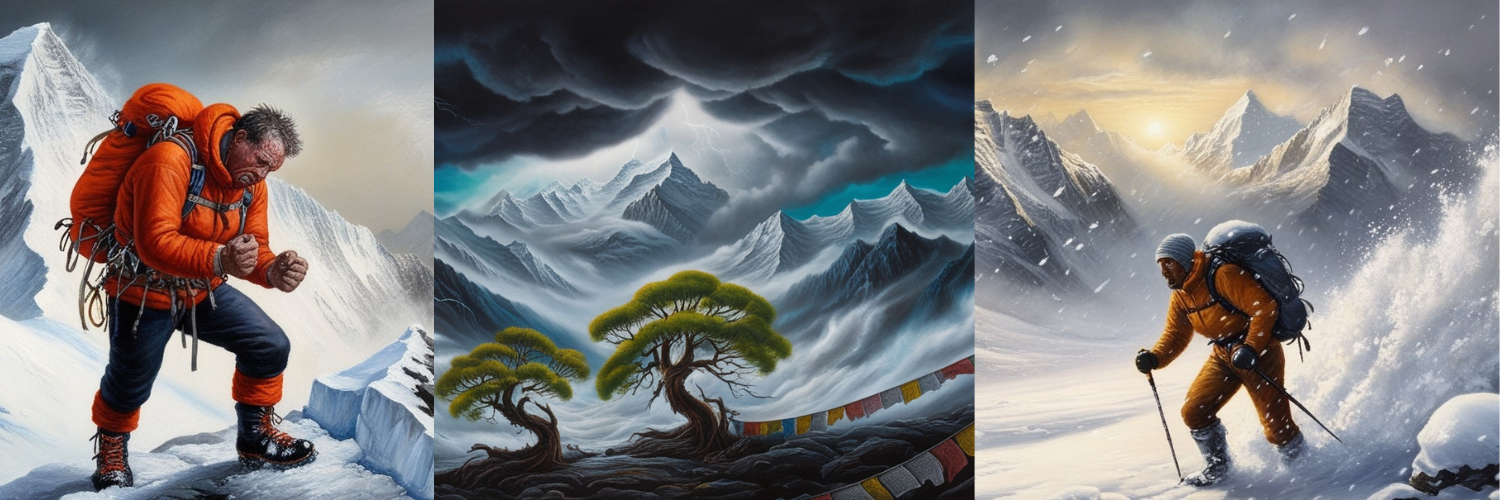

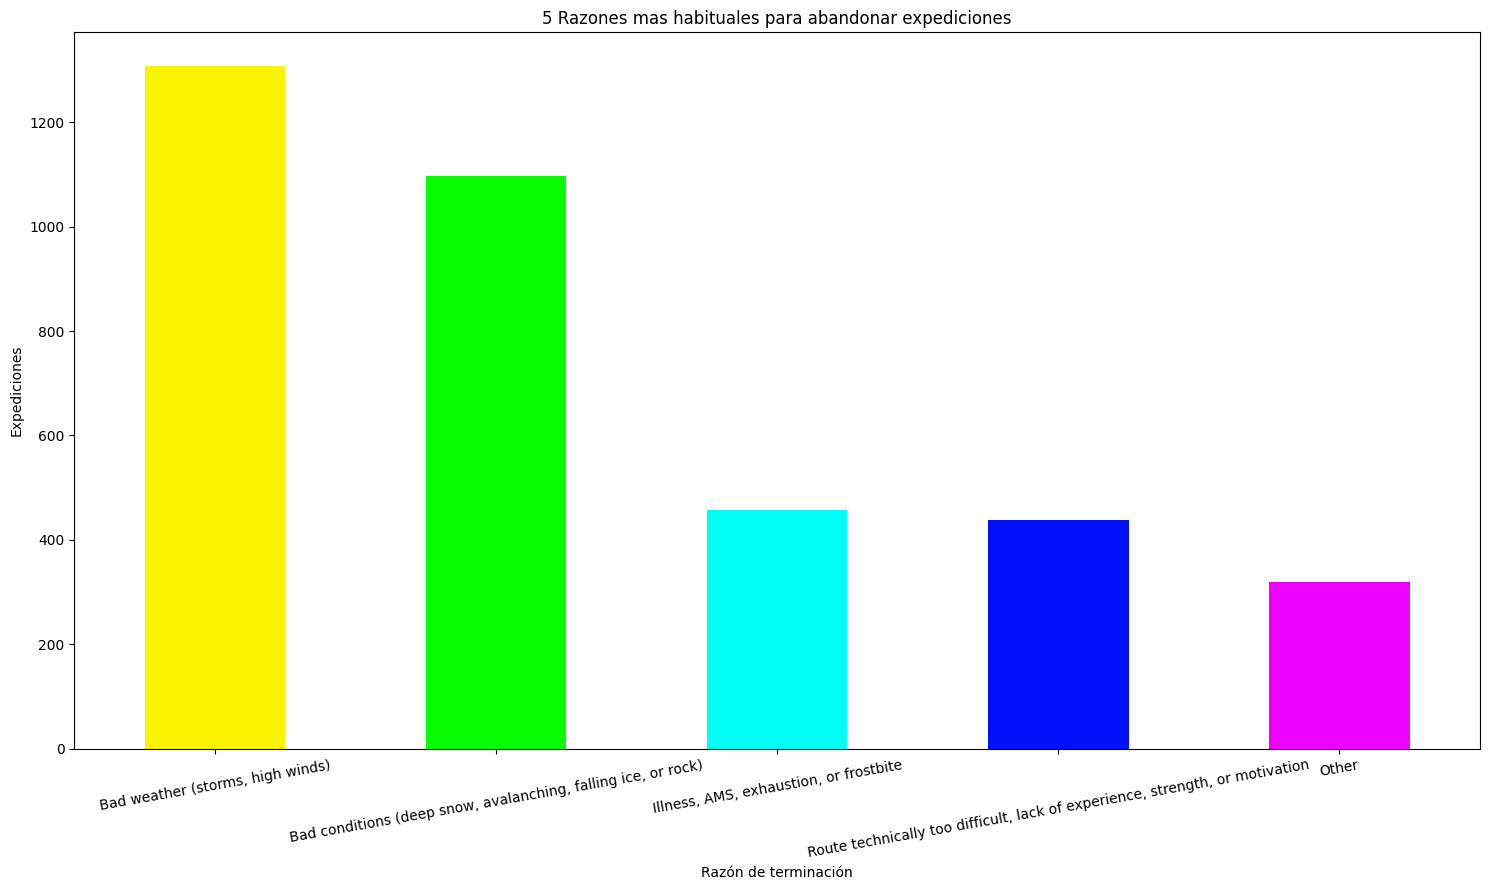

In [10]:
expediciones_sin_terminar = expeditions[expeditions['termination_reason'] != 'Success (main peak)']['termination_reason'].value_counts().head(5)
colores = sns.color_palette('hsv', len(expediciones_sin_terminar))

plt.figure(figsize=(15, 9))
expediciones_sin_terminar.plot(kind='bar', color=colores)
plt.title('5 Razones mas habituales para abandonar expediciones')
plt.xlabel('Razón de terminación')
plt.ylabel('Expediciones')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [11]:
# Vamos a enumerar las causas mas frecuentes por las cuales no se terminaron numerosas expediciones
causas_finalizar_expedicion = expeditions['termination_reason'].value_counts().reset_index().iloc[1:] # Quitamos la primera fila porque la expedicion se completaron con exito y buscamos causas por las que no
causas_finalizar_expedicion = causas_finalizar_expedicion.rename(columns={'count': 'Total'})
causas_finalizar_expedicion

termination_reason  Total
1                    Bad weather (storms, high winds)   1307
2   Bad conditions (deep snow, avalanching, fallin...   1097
3              Illness, AMS, exhaustion, or frostbite    458
4   Route technically too difficult, lack of exper...    438
5                                               Other    320
6                  Accident (death or serious injury)    299
7                               Did not attempt climb    233
8             Lack (or loss) of supplies or equipment    220
9                                   Success (subpeak)    126
10                                            Unknown     96
11                                       Lack of time     93
12                            Did not reach base camp     64
13                                  Success (claimed)     20
14                                   Attempt rumoured     11

Diversos motivos son los que causan que una expedición de personas preparadas y sherpas locales decidan no continuar en su cumbre hacía la cima, pero las más destacadas son estas tres:
 
- Mal tiempo, tormentas y fueres vientos.
- Malas condiciones como avalanchas o nieve profunda.  
- Enfermedades, congelación de miembros y otros males.
 
 
Respecto a las tormentas en la cordillera del Himalaya, cabe destacar que son tormentas severas muy destructivas, la meteorología en la zona en muy cambiante y nunca deja de sorprender a las expediciones que por muy preparadas que vayan siempre son motivo de peligro para los miembros de la expedición.
 
Avalanchas que se producen cuando enormes capas de nieve se desprenden la ladera de la montaña y se precipitan montaña abajo, enterrando y arrastrando todo a su paso. Las avalanchas más comunes ocurren 24 h después a tormentas fuertes, provocando una débil capa bajo la gran losa que se fractura.
 
Las enfermedades a grandes alturas puede provocar desde mal de altura, dificultad para respirar y tos, congelación por las temperaturas excesivamente frías o incluso edemas tanto pulmonar como cerebral, provocados por la falta de oxígeno y de excesos de fluidos en los pulmones.
El mejor y más rápido tratamiento para los escaladores es descender a una altitud menor, aunque muchos no pueden y deben ser ayudados o cargados.

### ¿Cuántas expediciones subieron con oxígeno?

In [29]:
oxigeno_en_expediciones = expeditions[(expeditions['oxygen_used']=='Yes')]
total_expediciones = pd.DataFrame(oxigeno_en_expediciones).value_counts().sum()
print(f'Total de expediciones con oxigeno: {total_expediciones}.')

Total de expediciones con oxigeno: 2912.


En los 20 años que distan entre 1997 y 2017 se ha incrementado en mas de un 40% el uso de oxígeno en las ascensiones del Himalaya, en las montañas de más de 8 mil metros, solo fueron sin oxígeno el 10,79% de los que hicieron cima.
En el Everest poco más del 1% de los alpinistas que alcanza cumbre no usan oxígeno.
El uso del oxígeno aumento en los 90’s a causa del nacimiento de las expediciones comerciales y ha continuado convirtiéndose en la base del nuevo turismo de alta montaña.

---

## 2. Picos ⛰️

### ¿Cuáles son los 8000 de la cordillera del Himalaya?

In [13]:
# Calculamos los picos de 8000 del Himalaya
ochomil= peaks[peaks['height_metres']>=8000]
ochomil.sort_values(by='height_metres',ascending=False)

Unnamed: 0 peak_id              peak_name  height_metres climbing_status
42           42    EVER                Everest           8850         Climbed
91           91    KANG          Kangchenjunga           8586         Climbed
112         112    LHOT                 Lhotse           8516         Climbed
188         188    YALU            Yalung Kang           8505         Climbed
122         122    MAKA                 Makalu           8485         Climbed
92           92    KANS    Kangchenjunga South           8476         Climbed
89           89    KANC  Kangchenjunga Central           8473         Climbed
205         205    LHOM          Lhotse Middle           8410         Climbed
117         117    LSHR            Lhotse Shar           8382         Climbed
20           20    CHOY                Cho Oyu           8188         Climbed
30           30    DHA1           Dhaulagiri I           8167         Climbed
123         123    MANA                Manaslu           8163         Climbed
2             2    ANN1            Annapurna I           8091         Climbed
362         362    YALW       Yalung Kang West           8077       Unclimbed
7             7    ANNM     Annapurna I Middle           8051         Climbed
6             6    ANNE       Annapurna I East           8026         Climbed

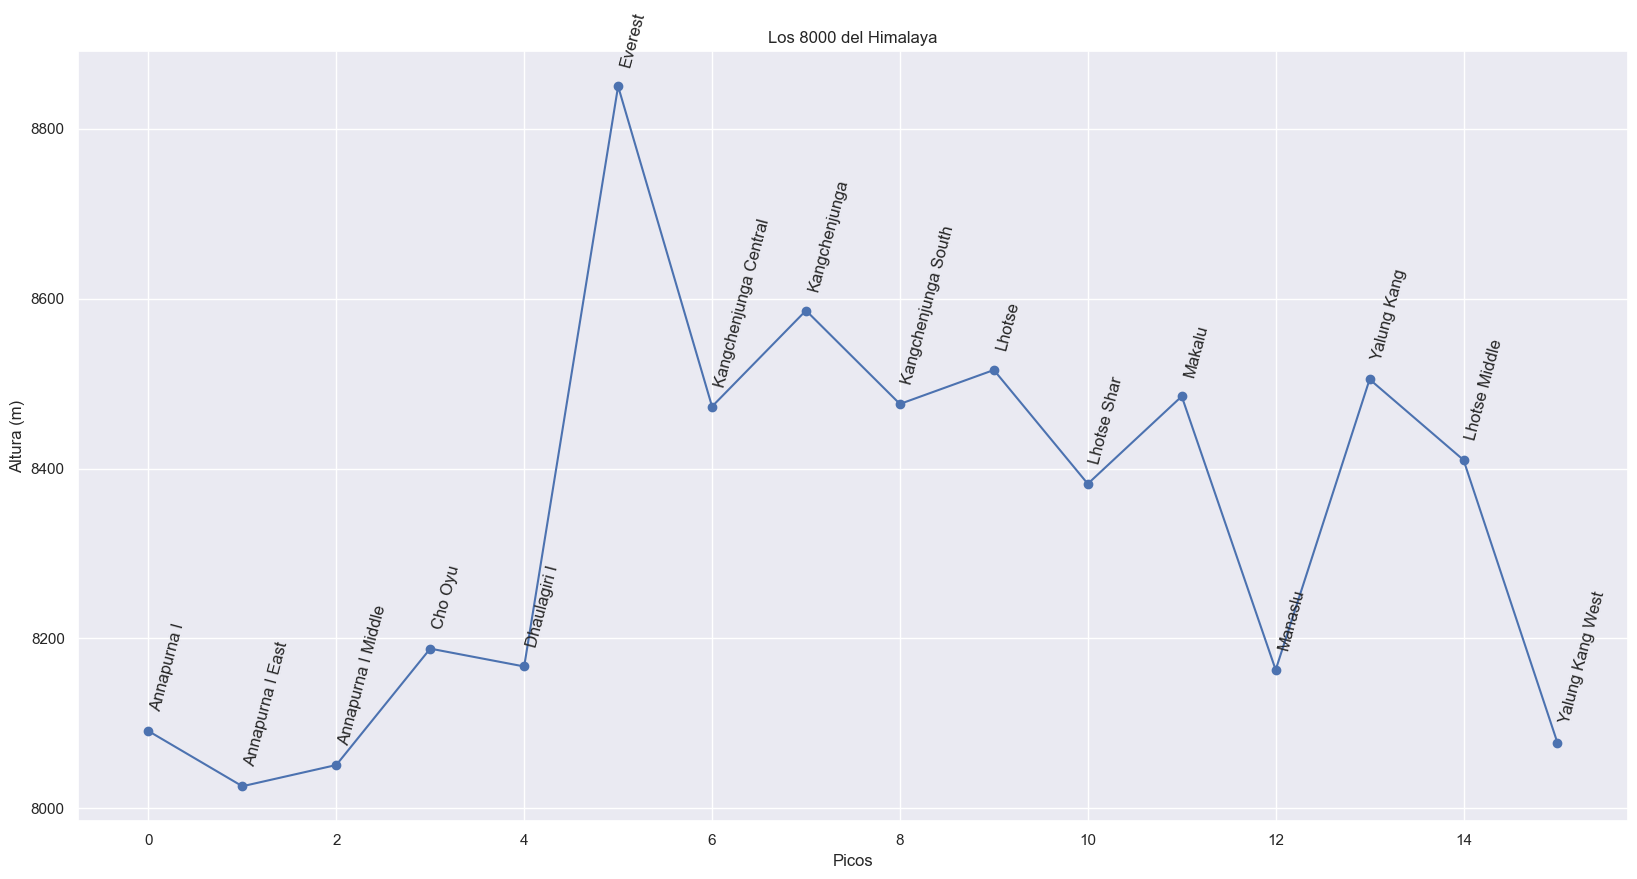

In [14]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20,10))
plt.plot(ochomil['height_metres'].values, marker='o', linestyle='-')
plt.title("Los 8000 del Himalaya") 
plt.xlabel("Picos") 
plt.ylabel("Altura (m)")


for i, txt in enumerate(ochomil['peak_name'].values):
    plt.annotate(txt, (i, ochomil['height_metres'].values[i]), textcoords="offset points", xytext=(0,15), ha='left', rotation=75, fontsize=12)

plt.show()

In [15]:
picos_8000 = {
    "Everest": [27.9881, 86.9250],
    "Kangchenjunga": [27.7025, 88.1475],
    "Lhotse": [27.9617, 86.9330],
    "Yalung Kang": [27.665, 88.120],
    "Makalu": [27.8897, 87.0883],
    "Kangchenjunga South": [27.6498, 88.1478],
    "Kangchenjunga Central": [27.6745, 88.144],
    "Lhotse Middle": [27.962, 86.930],
    "Lhotse Shar": [27.960, 86.940],
    "Cho Oyu": [28.0944, 86.6608],
    "Dhaulagiri I": [28.6967, 83.4875],
    "Manaslu": [28.5497, 84.5597],
    "Annapurna I": [28.5961, 83.8203],
    "Yalung Kang West": [27.7000, 88.1333], 
    "Annapurna I Middle": [28.5961, 83.8203], 
    "Annapurna I East": [28.5961, 83.8203],
}

mapa_himalaya = folium.Map(location=[27.7000, 84.9250], zoom_start=9)

for pico, coordenadas in picos_8000.items():
    folium.Marker(
        location=coordenadas,
        popup=pico,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa_himalaya)
    
mapa_himalaya

### ¿Hay más picos escalados que sin escalar?

In [16]:
# Vamos a conocer que picos han sido escalados y cuales no
escalados_vs_sin_escalar = peaks['climbing_status'].value_counts().reset_index()
escalados_vs_sin_escalar = escalados_vs_sin_escalar.rename(columns={'count': 'Total'})
pd.DataFrame(escalados_vs_sin_escalar)

climbing_status  Total
0         Climbed    341
1       Unclimbed    127

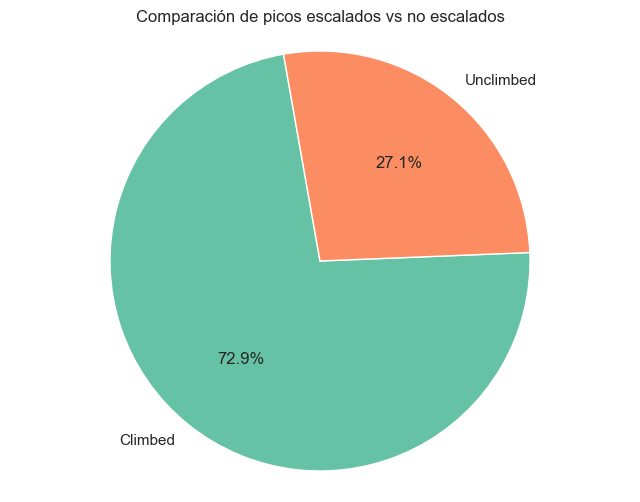

In [17]:
colores = ['#66c2a5', '#fc8d62']
plt.figure(figsize=(8, 6))
plt.pie(escalados_vs_sin_escalar['Total'], labels=escalados_vs_sin_escalar['climbing_status'], autopct='%1.1f%%', startangle=100, colors=colores)
plt.title('Comparación de picos escalados vs no escalados')
plt.axis('equal')
plt.show()

Varios picos son los que todavía no han sido escalados, dada su dificultad, por tragedias o incluso motivos religiosos, destacando el monte Machhapurhre, un pico declarado en 1957 como monte sagrado por ser la morada del dios Shiba. Desde entonces no han sido permitidas las ascensiones.

### ¿Cuáles son las nacionalidades con más primeras ascensiones? ¿Cuál fue el primer país en intentar llegar a la cumbre del Everest sin éxito?

In [30]:
# Vamos a conocer a traves del dataset original, las veces que se repite un pais en nuestra columna de 'most_first_ascents_country'
paises_mas_primeras_ascensiones = peaks_original['first_ascent_country'].value_counts()
pd.DataFrame(paises_mas_primeras_ascensiones)

count
first_ascent_country       
Japan, Nepal             61
Japan                    43
UK                       23
UK, Nepal                18
USA                      17
...                     ...
Japan, India              1
Austria, W Germany        1
Nepal, USA                1
Switzerland, Germany      1
Portugal                  1

[77 rows x 1 columns]

In [31]:
# Vamos a ver qué país intentó la subida al Everest sin exito
everest = members[(members['peak_name']=='Everest') & (members['year']==1921)].head()
everest

Unnamed: 0 expedition_id     member_id peak_id peak_name  year  season  \
22024       22024     EVER21101  EVER21101-01    EVER   Everest  1921  Spring   
23638       23638     EVER21101  EVER21101-09    EVER   Everest  1921  Spring   
23639       23639     EVER21101  EVER21101-03    EVER   Everest  1921  Spring   
26136       26136     EVER21101  EVER21101-07    EVER   Everest  1921  Spring   
26137       26137     EVER21101  EVER21101-05    EVER   Everest  1921  Spring   

      sex  age citizenship expedition_role hired success solo oxygen_used  \
22024   M   37          UK          Leader    No      No   No          No   
23638   M   46          UK      Exp Doctor    No      No   No          No   
23639   M   36          UK       Scientist    No      No   No          No   
26136   M   55          UK         Climber    No      No   No          No   
26137   M   35          UK         Climber    No      No   No          No   

      died injured  
22024   No      No  
23638   No      No  
23639   No      No  
26136   No      No  
26137   No      No

### ¿Cuál es el pico con mas letal?

In [21]:
pico_mas_letal = expeditions[(expeditions['termination_reason']=='Accident (death or serious injury)')]
pico_mas_letal = pico_mas_letal['peak_name'].value_counts()
pd.DataFrame(pico_mas_letal)


count
peak_name           
Everest           51
Annapurna I       24
Manaslu           19
Lhotse            17
Ama Dablam        16
...              ...
Ganchenpo          1
Kabru North        1
Kotang             1
Kusum Kanguru      1
Gurja Himal        1

[77 rows x 1 columns]

In [ ]:
coordenadas_picos_mas_letales = {
    "Everest": [27.9881, 86.9250],
    "Annapurna I": [28.5961, 83.8203],
    "Manaslu": [28.5497, 84.5597],
    "Lhotse": [27.9617, 86.9330],
    "Ama Dablam": [27.8616, 86.8615]
}

mapa_himalaya = folium.Map(location=[27.7000, 84.9250], zoom_start=9)

for pico, coordenadas in coordenadas_picos_mas_letales.items():
    folium.Marker(
        location=coordenadas,
        popup=pico,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa_himalaya)
    
mapa_himalaya

El monte Everest con más de 300 personas a fecha de hoy ,han perdido la vida tratando de escalarlo, la mayoría de las muertes se han atribuido a avalanchas, lesiones o por caída o colapso de hielo, hipotermia o problemas de salud. No todos los cadáveres han sido localizados por lo que la mayoría de los cuerpos siguen en la montaña.
El segundo más letal es el “Annapurna I” con más de 72 muertes a día de hoy de las 365 personas que lo han escalado.

---

## 3. Miembros 🧗

### ¿Cuál ha sido el suceso mas grave en la cordillera del Himalaya por españoles?

In [ ]:
# Consultamos la informacion del dataset que demuestra la veracidad de la informacion
primer_español_fallecido = members[(members['citizenship']=='Spain') & (members['peak_name']=='Pumori') & (members['year']==2001) & (members['died']=='Yes')]
primer_español_fallecido

Unnamed: 0 expedition_id     member_id peak_id peak_name  year  season  \
31253       31253     PUMO01302  PUMO01302-03    PUMO    Pumori  2001  Autumn   
31254       31254     PUMO01302  PUMO01302-04    PUMO    Pumori  2001  Autumn   
31255       31255     PUMO01302  PUMO01302-05    PUMO    Pumori  2001  Autumn   
31256       31256     PUMO01302  PUMO01302-01    PUMO    Pumori  2001  Autumn   
31259       31259     PUMO01302  PUMO01302-07    PUMO    Pumori  2001  Autumn   

      sex  age citizenship expedition_role hired success solo oxygen_used  \
31253   M   29       Spain         Climber    No      No   No          No   
31254   M   22       Spain         Climber    No      No   No          No   
31255   M   23       Spain         Climber    No      No   No          No   
31256   M   23       Spain          Leader    No      No   No          No   
31259   M   22       Spain         Climber    No      No   No          No   

      died injured  
31253  Yes      No  
31254  Yes      No  
31255  Yes      No  
31256  Yes      No  
31259  Yes      No

El 16 de octubre de 2001 , cinco escaladores, los navarros Aritz Artieda, Javier Arkauz y César Nieto y los guipuzcoanos Beñat Arrue e Iñaki Ayerza, murieron al se aplastados por un alud en el monte Pumori (7161 metros) en Nepal

### ¿Cuántos miembros de las expediciones fueron afectados a lo largo de los años?

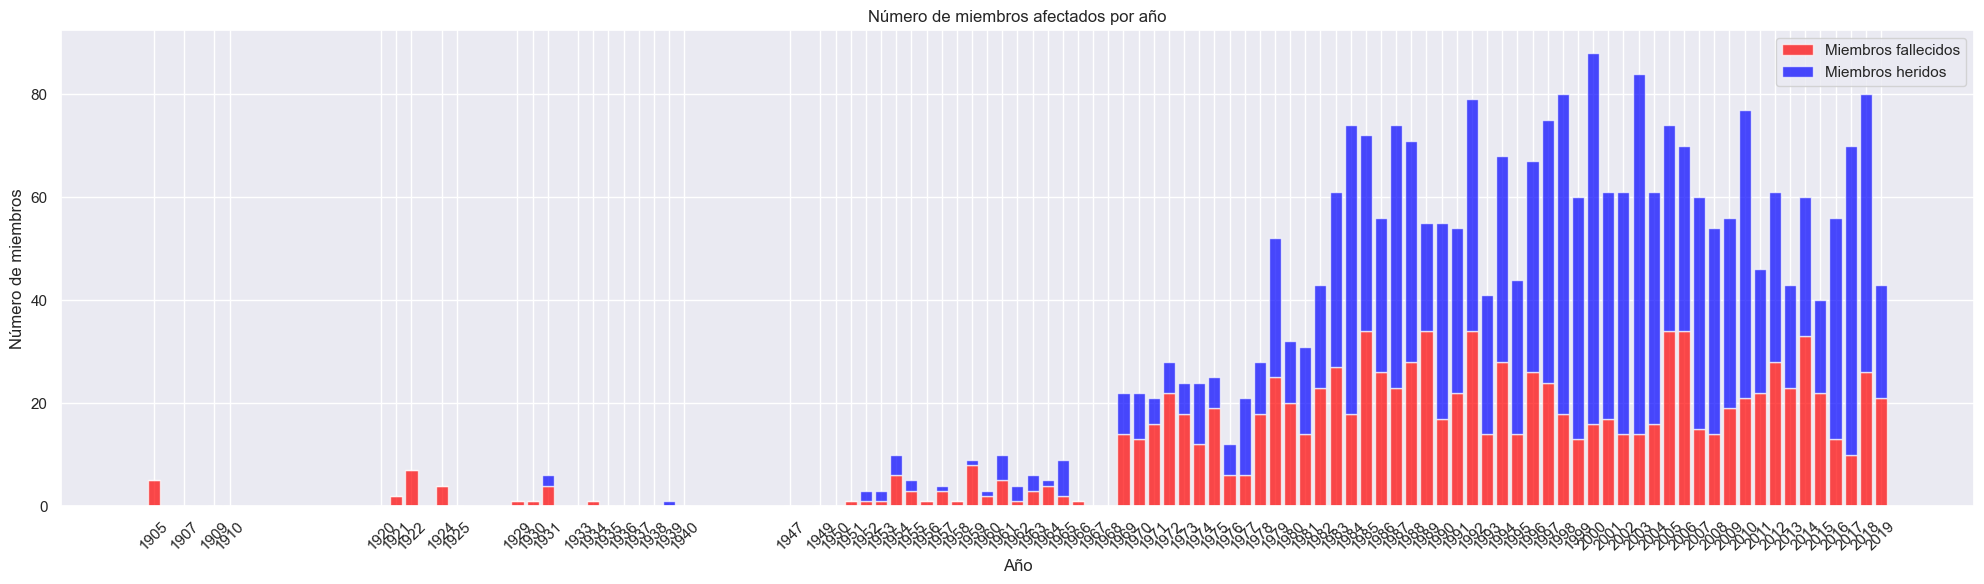

In [32]:
# Añadimos nuevamente el csv original y creamos un df nuevo para usarlo en esta grafica
miembros_fallecidos = pd.read_csv('members.csv')
miembros_fallecidos_filtrado = miembros_fallecidos[['year', 'died', 'injured']]

miembros_agrupados = miembros_fallecidos_filtrado.groupby('year').sum().reset_index()

plt.figure(figsize=(20, 6))
plt.bar(miembros_agrupados['year'], miembros_agrupados['died'], color='red', alpha=0.7, label='Miembros fallecidos')
plt.bar(miembros_agrupados['year'], miembros_agrupados['injured'], bottom=miembros_agrupados['died'], color='blue', alpha=0.7, label='Miembros heridos')
plt.xlabel('Año')
plt.ylabel('Número de miembros')
plt.title('Número de miembros afectados por año')
plt.legend()
plt.grid(True)
plt.xticks(miembros_agrupados['year'], rotation=45)
plt.tight_layout()
plt.show()

### ¿Qué promedio de miembros son necesarios para llevar a cabo una expedición?

In [ ]:
# Vamos a buscar las expediciones que finalizaron con exito y calcularemos la media de miembros que son necesarias
expediciones_exitosas = expeditions[expeditions['termination_reason'] =='Success (main peak)']['members'].mean()
print(f'El promedio de miembros correcto para una expedicion es de: {np.ceil(expediciones_exitosas).astype(int)} miembros')

El promedio de miembros correcto para una expedicion es de: 7 miembros


### ¿Qué roles son mas habituales en una expedición?

In [ ]:
roles = members['expedition_role'].value_counts()
top_10_roles = roles.head(10)
pd.DataFrame(top_10_roles).rename(columns={'count': 'Total'})

Total
expedition_role       
Climber          44688
H-A Worker       14489
Leader           10036
Exp Doctor        1450
Deputy Leader     1238
Sirdar             579
H-A Assistant      391
BC Manager         385
Climbing Leader    356
Member             333

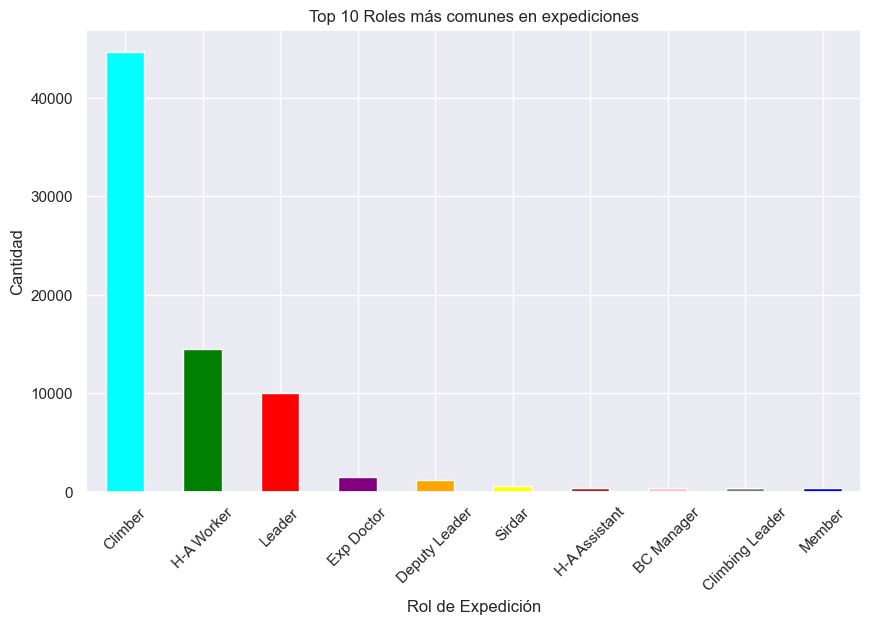

In [33]:
# Calculamos el top 10 de roles mas comunes de ver en expediciones
contador_roles = members['expedition_role'].value_counts()
top_10_roles = contador_roles.head(10)

colores = ['cyan', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'blue']

plt.figure(figsize=(10, 6))
top_10_roles.plot(kind='bar', color=colores)
plt.xlabel('Rol de Expedición')
plt.ylabel('Cantidad')
plt.title('Top 10 Roles más comunes en expediciones')
plt.xticks(rotation=45)
plt.show()

**Climber**, escaladores son los miembros principales de la expedición. Su objetivo es alcanzar cumbre.
 
**H-A Worker**, más conocidos como Sherpas son los guías especializados en altitudes elevadas también conocidos como porteadores tienen una resistencia excepcional a la altitud.
 
**Leader**, es el líder de la expedición , es el rreponsable de planificar y ejecutar la expedición, toma decisiones estratégicas y es responsable  de la seguridad y el bienestar de todos.
 
**Exp Doctor**, Médico especializado en medicina de alta montaña.
 
**Deputy Leader**, Segundo al mando después de líder de la expedición , este asume responsabilidades en caso de la ausencia del líder.
 
**Sirdar**, o sardar, líder o guía de alta montaña de los sherpas,  generalmente un Sherpa experimentado y respetado.
 
**H-A Assistant (High altitude Assistant)**, Asistentes de los trabajadores de alta montaña son los sherpas menos experimentados.
 
**BC Manager (Base camp Manager)**, Responsable de la gestión del campamento base.
 
**Climbing leader**, normalmente un escalador muy experimentado.
 
**Member**, miembro de la expedición pueden ser personas con roles no específicos o no mencionados anteriormente.

### De los alpinistas del Himalaya, ¿cuántos escalaron solos y cuántos acompañados?

In [ ]:
# Vamos a consultar cuantos expedicionistas van solos
solos= members['solo']=='Yes'
pd.DataFrame(solos.value_counts())

count
solo        
False  76398
True     121

In [ ]:
# Vamos a conocer cuanta gente hizo expediciones solo y fallecieron
solos_fallecidos = members[(members['solo']=='Yes') & (members['died']=='Yes')].value_counts().sum()
print(f'Los expedicionistas que fueron solos y sobrevivieron fueron: {solos_fallecidos} personas.')

Los expedicionistas que fueron solos y sobrevivieron fueron: 5 personas.


In [ ]:
# Vamos a conocer cuanta gente hizo expediciones acompañadas y fallecieron
acompañados_fallecidos = members[(members['solo']=='No') & (members['died']=='Yes')].value_counts().sum()
print(f'Los expedicionistas que fueron acompañados y fallecieron fueron: {acompañados_fallecidos} personas.')

Los expedicionistas que fueron acompañados y fallecieron fueron: 1101 personas.


### ¿Cuántas mujeres realizaron expediciones? ¿Cuál fue la primera en subir a Everest?

In [ ]:
# Vamos a calcular la cantidad de mujeres que han realizado expediciones desde 1905-2019
total_mujeres_expediciones = members[(members['sex']=='F') & (members['success']=='Yes')].value_counts().sum()
print(f'El numero de mujeres que realizaron con exito expediciones al Himalaya fue de: {total_mujeres_expediciones}')

El numero de mujeres que realizaron con exito expediciones al Himalaya fue de: 2306


In [ ]:
# Ahora vamos a hacer la segunda consulta para saber cual fue la primera mujer en subir a Everest
primera_mujer = members[(members['sex']=='F') & (members['success']=='Yes') & (members['year']==1975) & (members['peak_name']=='Everest')].iloc[:-1]
primera_mujer

Unnamed: 0 expedition_id     member_id peak_id peak_name  year  season  \
8564        8564     EVER75101  EVER75101-02    EVER   Everest  1975  Spring   

     sex  age citizenship expedition_role hired success solo oxygen_used died  \
8564   F   35       Japan   Deputy Leader    No     Yes   No         Yes   No   

     injured  
8564      No

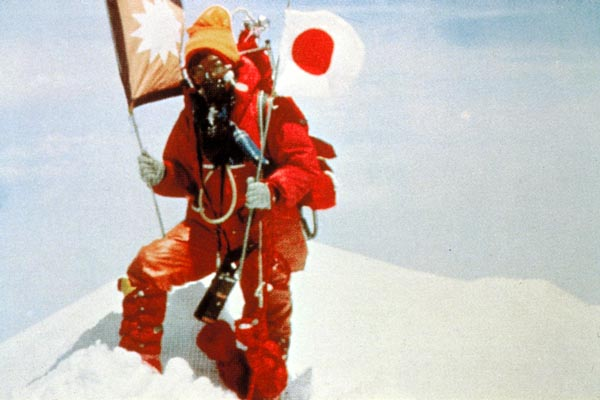

Junko Tabei, l Primera mujer en coronar el Everest, demostró que una mujer podía alcanzar las mismas metas que un hombre, algo inconcebible en la sociedad de su tiempo. El 6 de mayo de 1975, todos los estereotipos quedaron pulverizados cuando Tabei coronó el monte Everest acompañada del Sherpa Angustias Tsering.

---

## CONCLUSIÓN

Después de analizar detalladamente los datos a lo largo de nuestro estudio, se ha evidenciado que escalar los ochomiles del Himalaya, y en concreto el Everest, se ha convertido en un negocio lucrativo. Muchas expediciones 'comerciales' no tienen en cuenta el nivel de experiencia de los escaladores, llevando a personas poco preparadas hasta la cima sin evaluar posibles consecuencias. Como mencionamos anteriormente, las temporadas de escalada son breves, limitando los días al año la posibilidad de ascender a la cima, cuando las condiciones meteorológicas son favorables y no hay vientos fuertes y tormentas.
 

El 22 de mayo de 2019 se hicieron virales estas imágenes como el día más concurrido de la historia del Everest: más de 200 personas pasaron por la cima. Por ello, el gobierno nepalí ha introducido normas para evitar muertes no accidentales y reducir los graves efectos medioambientales, obligando a ir con un sherpa o guía nativo, presentar certificados médicos y demostrar que han escalado antes un pico de 6500 metros (como mínimo). Alrededor de 800 personas escalan cada año la montaña más alta del mundo, incluyendo sherpas. Estas expediciones dejan a su paso botellas de oxígeno vacías, latas de comida y residuos humanos que se han ido acumulando durante décadas. De hecho, en 2019 se llevó a cabo una campaña de recogida que recuperó más de 10 toneladas de residuos y 4 cadáveres abandonados en la montaña. La presencia de cadáveres en los picos del Himalaya presenta un debate ético, moral y cultural. Por un lado, moverlos supondría un riesgo para los rescatistas y alpinistas, y por otro, el daño a la calidad del agua y el suelo por ser un entorno de descomposición lenta.
 

Este estudio nos ha permitido entender que, además de ser una aventura y proeza deportiva hacer expediciones a los picos más altos del mundo, también es un negocio. Mientras la cordillera del Himalaya siga siendo un símbolo de desafío, también será un lugar de problemas éticos, medioambientales y comerciales que deben ser gestionados por los gobiernos de los países involucrados para preservar su respeto sagrado.
 